>[Non-convex optimization](#scrollTo=ZEsBWVUyUsEz)

>>[Newton method](#scrollTo=Q0_4ZtasUzdY)

>>[Simulated Annealing](#scrollTo=0MKJnl_jM10Z)



# Non-convex optimization

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def cost_func(X):
  f = 2*(X[0]**2) + 2*(X[1]**2)-12*X[1]*np.sin(0.2*np.pi*X[0])-X[0]*X[1]
  return f

## Newton method

In [3]:
def contourplot(costfun, x1min, x1max, x2min, x2max, ncontours=50, fill=True):

    x1 = np.linspace(x1min, x1max, 20)
    x2 = np.linspace(x2min, x2max, 20)
    X1, X2 = np.meshgrid(x1,x2)
    Z = costfun(np.array([X1, X2]))
    if fill:
        contour = plt.contourf(X1,X2,Z,ncontours); # plot the contours
    else:
        contour = plt.contour(X1,X2,Z,ncontours); # plot the contours
    plt.colorbar(contour)

In [4]:
def gradient(X):
  g = np.array([
      4*X[0]-2.4*np.pi*X[1]*np.cos(0.2*np.pi*X[0])-X[1],
      4*X[1]-12*np.sin(0.2*np.pi*X[0])-X[0]])
  return g

In [5]:
def hessian(X):
  h = np.array([
      [4+0.48*np.pi**2*X[1]*np.sin(0.2*np.pi*X[0]), -2.4*np.pi*np.cos(0.2*np.pi*X[0])-1],
      [-2.4*np.pi*np.sin(0.2*np.pi*X[0])-1, 4]
  ])
  return h

In [6]:
def newton_optimization(cost_func, initial_point, step_size, max_iter=1000):
    current_point = initial_point.astype(float)
    parray = np.array([current_point])
    farray = [cost_func(current_point)]

    for i in range(max_iter):
        gradient_current = gradient(current_point)
        hessian_current = hessian(current_point)
        direction = -np.linalg.solve(hessian_current, gradient_current)
        current_point += step_size * direction

        parray = np.append(parray, [current_point], axis=0)
        farray.append(cost_func(current_point))
    return np.array(parray), np.array(farray)

In [7]:
initial_point = np.array([1,3])
step_size = 0.5
max_iter=20
parray, farray = newton_optimization(cost_func, initial_point, step_size, max_iter)
print(f"Optimal point x1 = {parray[-1][0]:.2f} & x2 = {parray[-1][1]:.2f}")
print(f"Optimal cost value f = {farray[-1]:0.2f}")

Optimal point x1 = 2.18 & x2 = 3.48
Optimal cost value f = -14.78


In [21]:
cost_func(np.array([2.87,-15]))

684.6815319767827

In [22]:
fit = lambda x: -cost_func(x)
fit(np.array([2.87,-15]))

-684.6815319767827

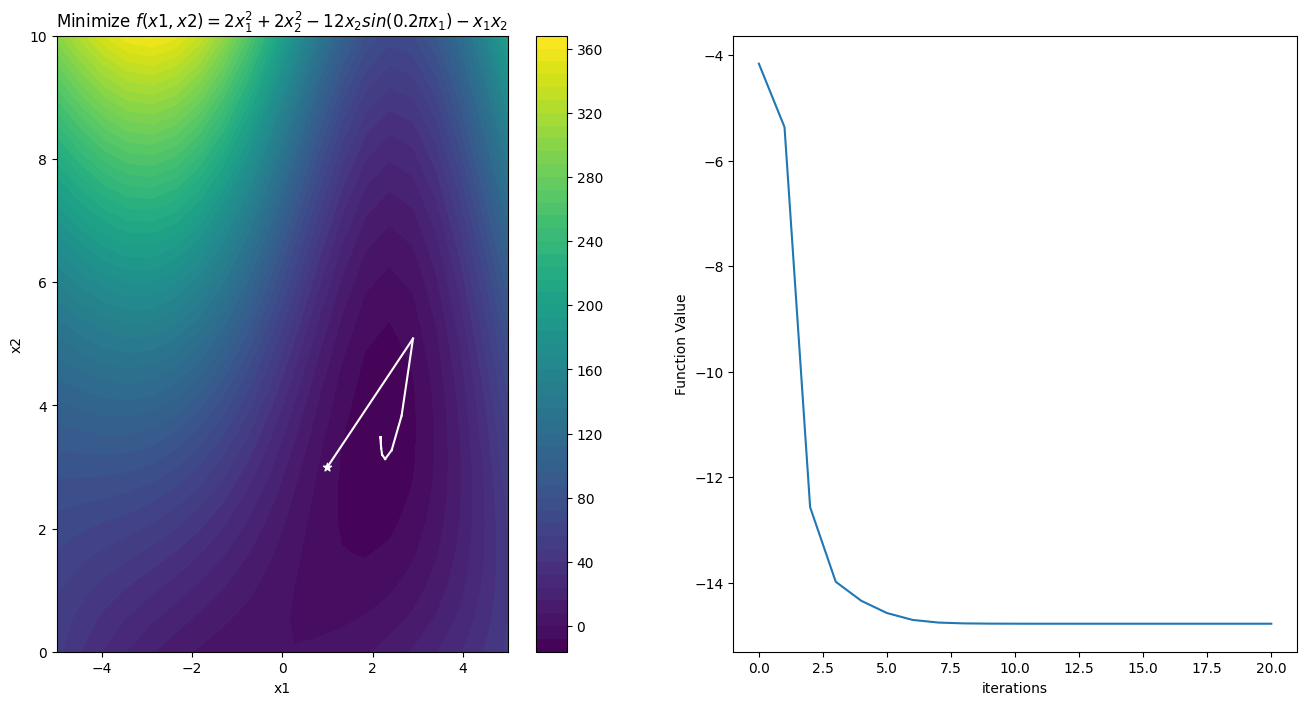

In [8]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
x1min, x1max, x2min, x2max = -5, 5, 0, 10
contourplot(cost_func, x1min, x1max, x2min, x2max)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Minimize $f(x1,x2)=2x_1^2+2x_2^2-12x_2sin(0.2\pi x_1)-x_1x_2$");
plt.scatter(parray[0,0],parray[0,1],marker="*",color="w")
for i in range(1,len(parray)):
        plt.plot((parray[i-1,0],parray[i,0]), (parray[i-1,1],parray[i,1]), "w")
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)

plt.subplot(1,2,2)
plt.plot(farray)
plt.xlabel("iterations")
plt.ylabel("Function Value");

##Simulated Annealing

In [15]:
def clip_to_search_space(solution, search_space):
    return np.clip(solution, search_space[0], search_space[1])

In [24]:
def simulated_annealing(fitness_func, initial_solution, initial_temperature, num_iterations, search_space):
    current_solution = initial_solution
    current_score = fitness_func(current_solution)
    best_solution = current_solution
    best_score = current_score

    for iteration in range(num_iterations):
        temperature = initial_temperature / (1 + iteration)

        # Generate a random neighbor solution within the search space
        neighbor_solution = current_solution + np.random.normal(0, 0.5, size=len(initial_solution))
        neighbor_solution = clip_to_search_space(neighbor_solution, search_space)
        neighbor_score = fitness_func(neighbor_solution)

        score_change = neighbor_score - current_score

        # Accept the neighbor solution with a certain probability
        if neighbor_score > current_score:
          current_solution = neighbor_solution
          current_score = neighbor_score
        elif np.random.rand() > np.exp(-score_change/temperature):
          current_solution = neighbor_solution
          current_score = neighbor_score

        if current_score > best_score:
          best_solution = current_solution
          best_score = current_score

    return best_solution, best_score

In [30]:
# Set the initial parameters
initial_solution = np.array([0, 0])
initial_temperature = 100.0
num_iterations = 100
search_space = np.array([[-15,-15],[15,15]])#[[x0_min,x1_min],[x0_max,x1_max]]
# Since simulated anneling optimizes a fitness function , we pass cost function as opposite
best_solution, best_score = simulated_annealing(lambda x: -cost_func(x), initial_solution, initial_temperature, num_iterations, search_space)

print("Best Solution:", best_solution)
print("Best Cost:", -best_score)

Best Solution: [-2.21251969 -3.56055735]
Best Cost: -14.763740570550738
